<h2>Content<h2>
<a href='#Overview'> Overview </a><br>
<a href='#Visual'>Data Visualization </a><br>
<a href='#model'>Model Fitting </a><br>
<a href='#reg'>Logistic Regression </a><br>
<a href='#tree'>Decision Tree </a><br>
<a href='#forest'>Random Forest </a><br>
<a href='#best'>Best Model </a><br>
<a href='#grid'>Grid Search </a><br>
<a href='#features'>Important Features </a><br>



<a id='Overview'></a>
# Overview 


Dataset is taken from Kaggle https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Dataset has 9 features and 768 records. Here we are trying to predict whether patient can have diabetes from the feature available in our dataset.Data is gathered on female patients only. The outcome 1 stands for diabetes and 0 for non diabetes.

We will be using Logistic Regression, Decision Tree, Random Forest with Cross Validation and  Grid search 

Evaluation method: RMSE, R squared, Confusion matrix, Precision , Recall, ROC, AUC to evaluate the model 

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [106]:
diabetes =  pd.read_csv("diabetes.csv")

In [107]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [109]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
#dataset doesn't contain any null value hence we are moving to visualization 

<a id='Visual'></a>
## Data Visualization 

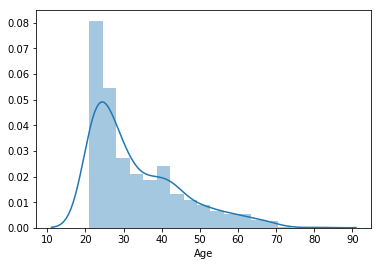

In [111]:
sns.distplot(diabetes['Age'])

#### Participant age is mostly in range of 20-40

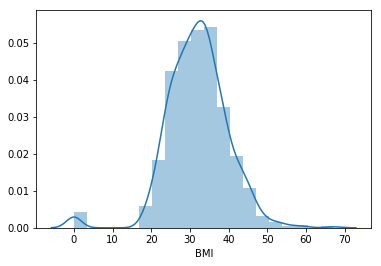

In [112]:
sns.distplot(diabetes['BMI'],bins=20)
# outlier with BMI as 0, we need to study this record

In [113]:
#diabetes[diabetes.where(diabetes['BMI']<10).notnull()].index.tolist()
diabetes[diabetes['BMI']<10]
diabetes[diabetes['BMI']<10].index


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64')

#### Dropping the rows whose BMI level is 0 as there is no meaning full data in others columns of that rows 

In [114]:
diabetes=diabetes.drop([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706])


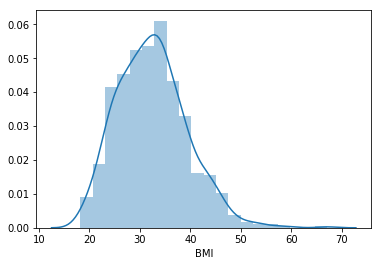

In [115]:
sns.distplot(diabetes['BMI'],bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E93CBE0240>,
      dtype=object)

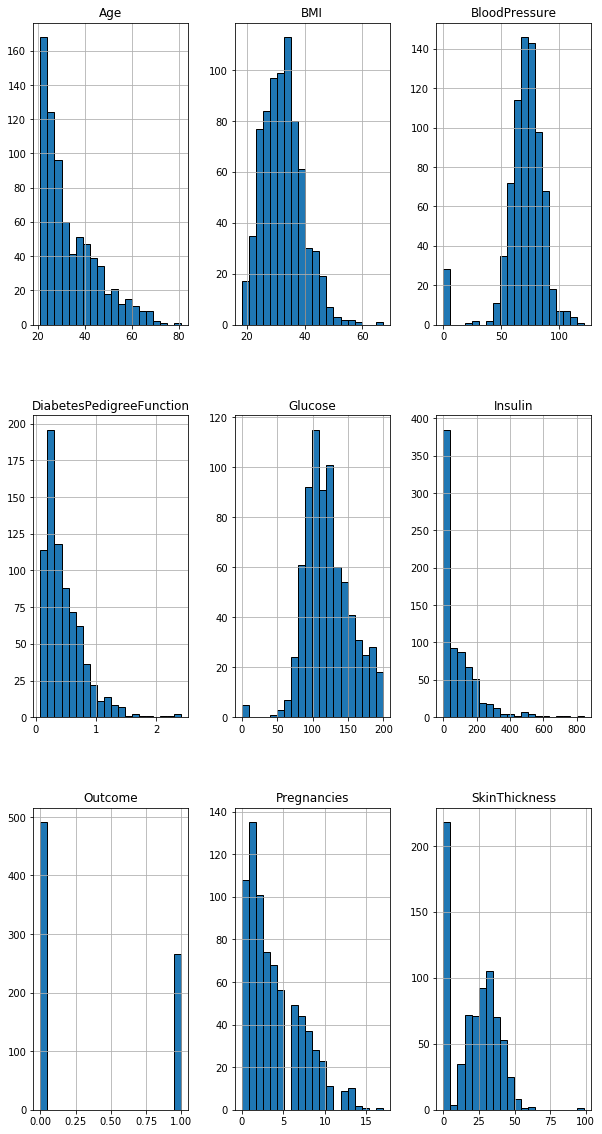

In [116]:
#plt.figure(figsize=(35,60),)
diabetes.hist(bins=20,figsize=(10,20),edgecolor='Black')
plt.show()

#### Identifying BloodPressure,Glucose, skin thickness with 0 value records

In [117]:
print("Glucose < 10: ",diabetes[diabetes['Glucose'] < 10].shape)
print("Blood Pressure < 10:",diabetes[diabetes['BloodPressure'] < 10].shape)

print("Skin thickness < 10:", diabetes[diabetes['SkinThickness'] < 10].shape)
#diabetes[diabetes['SkinThickness','Glucose','BloodPressure'] < 10]

#diabetes.where((diabetes['SkinThickness']<10) & (diabetes['Glucose']<10) & (diabetes['BloodPressure']<10)).notnull()
#diabetes[diabetes['BloodPressure']<10 & (diabetes['Glucose']<10)]

Glucose < 10:  (5, 9)
Blood Pressure < 10: (28, 9)
Skin thickness < 10: (222, 9)


#### Dropping the records with skin thickness = 0 will remove many records. Hence we will exclude the attribute from training the model. Filling the blood pressure and glucose with mean value of respective columns

In [118]:
diabetes[diabetes['Glucose'] < 10]
mean_glu = diabetes['Glucose'].mean()
mean_glu
diabetes['Glucose'] = diabetes['Glucose'].mask(diabetes['Glucose'] < 10,mean_glu)
diabetes[diabetes['Glucose'] < 10]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


121.13606340819022

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [119]:
diabetes[diabetes['BloodPressure'] < 10]
mean_BP = diabetes['BloodPressure'].mean()
mean_BP
diabetes['BloodPressure'] = diabetes['BloodPressure'].mask(diabetes['BloodPressure'] < 10,mean_BP)
diabetes[diabetes['BloodPressure'] < 10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
78,0,131.0,0,0,0,43.2,0.270,26,1
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1
266,0,138.0,0,0,0,36.3,0.933,25,1
269,2,146.0,0,0,0,27.5,0.240,28,1
300,0,167.0,0,0,0,32.3,0.839,30,1


69.69088507265522

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [120]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

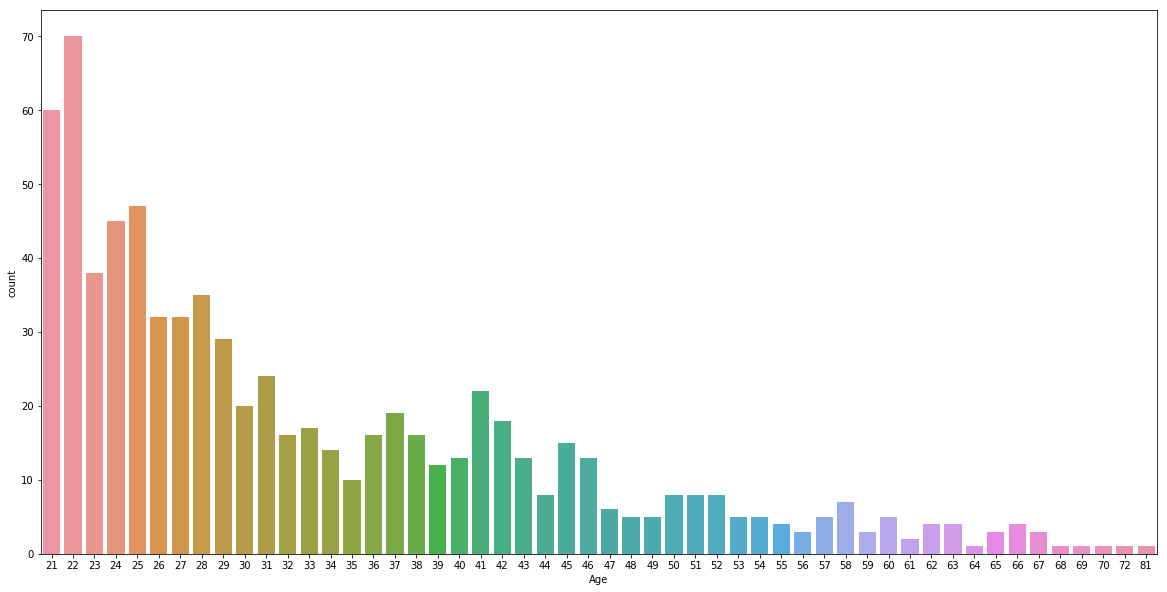

In [121]:
plt.figure(figsize=(20,10))
sns.countplot("Age",data=diabetes)
plt.show()

In [123]:
diabetes['Outcome'].value_counts()

0    491
1    266
Name: Outcome, dtype: int64

#### Non Diabetics entry are double of Diabetic entry

In [124]:
dia_gp_age=diabetes[diabetes['Outcome']==1].groupby(['Outcome','Age'])['Outcome'].count()

pandas.core.series.Series

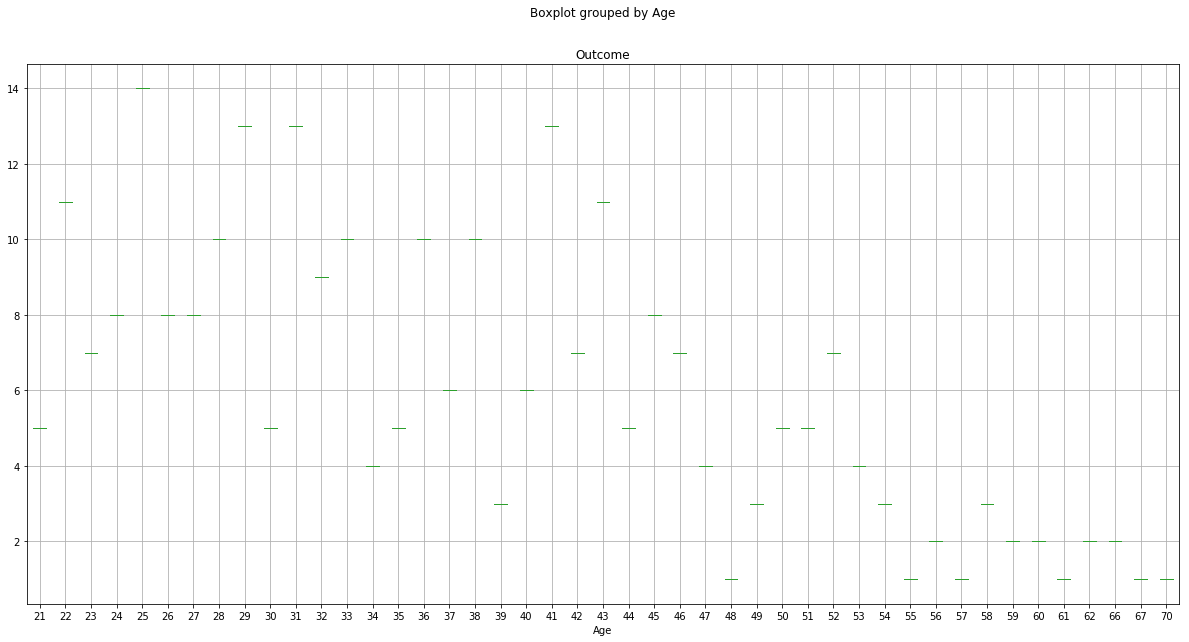

In [125]:
type(dia_gp_age)
dp = pd.DataFrame(dia_gp_age)
#plt.figure(figsize=(30,15))
dp.boxplot(column='Outcome',by='Age',figsize=(20,10))
#sns.boxplot(x="Age",y="Outcome",data=dp)

#### Most people are diabetic in yearly ages like 25-30

Text(0.5,0,'Age')

Text(0,0.5,'Pregnant in weeks')

Text(0.5,1,'Relation between Age & Pregnancy')

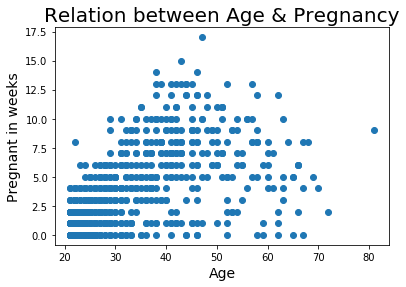

In [126]:
plt.scatter(diabetes['Age'],diabetes['Pregnancies'])
plt.xlabel('Age',fontsize=14)
plt.ylabel('Pregnant in weeks',fontsize=14)
plt.title('Relation between Age & Pregnancy',fontsize=20)
plt.show()

#### 70 and 80 year old women are 2 and 9 week pregnant !!

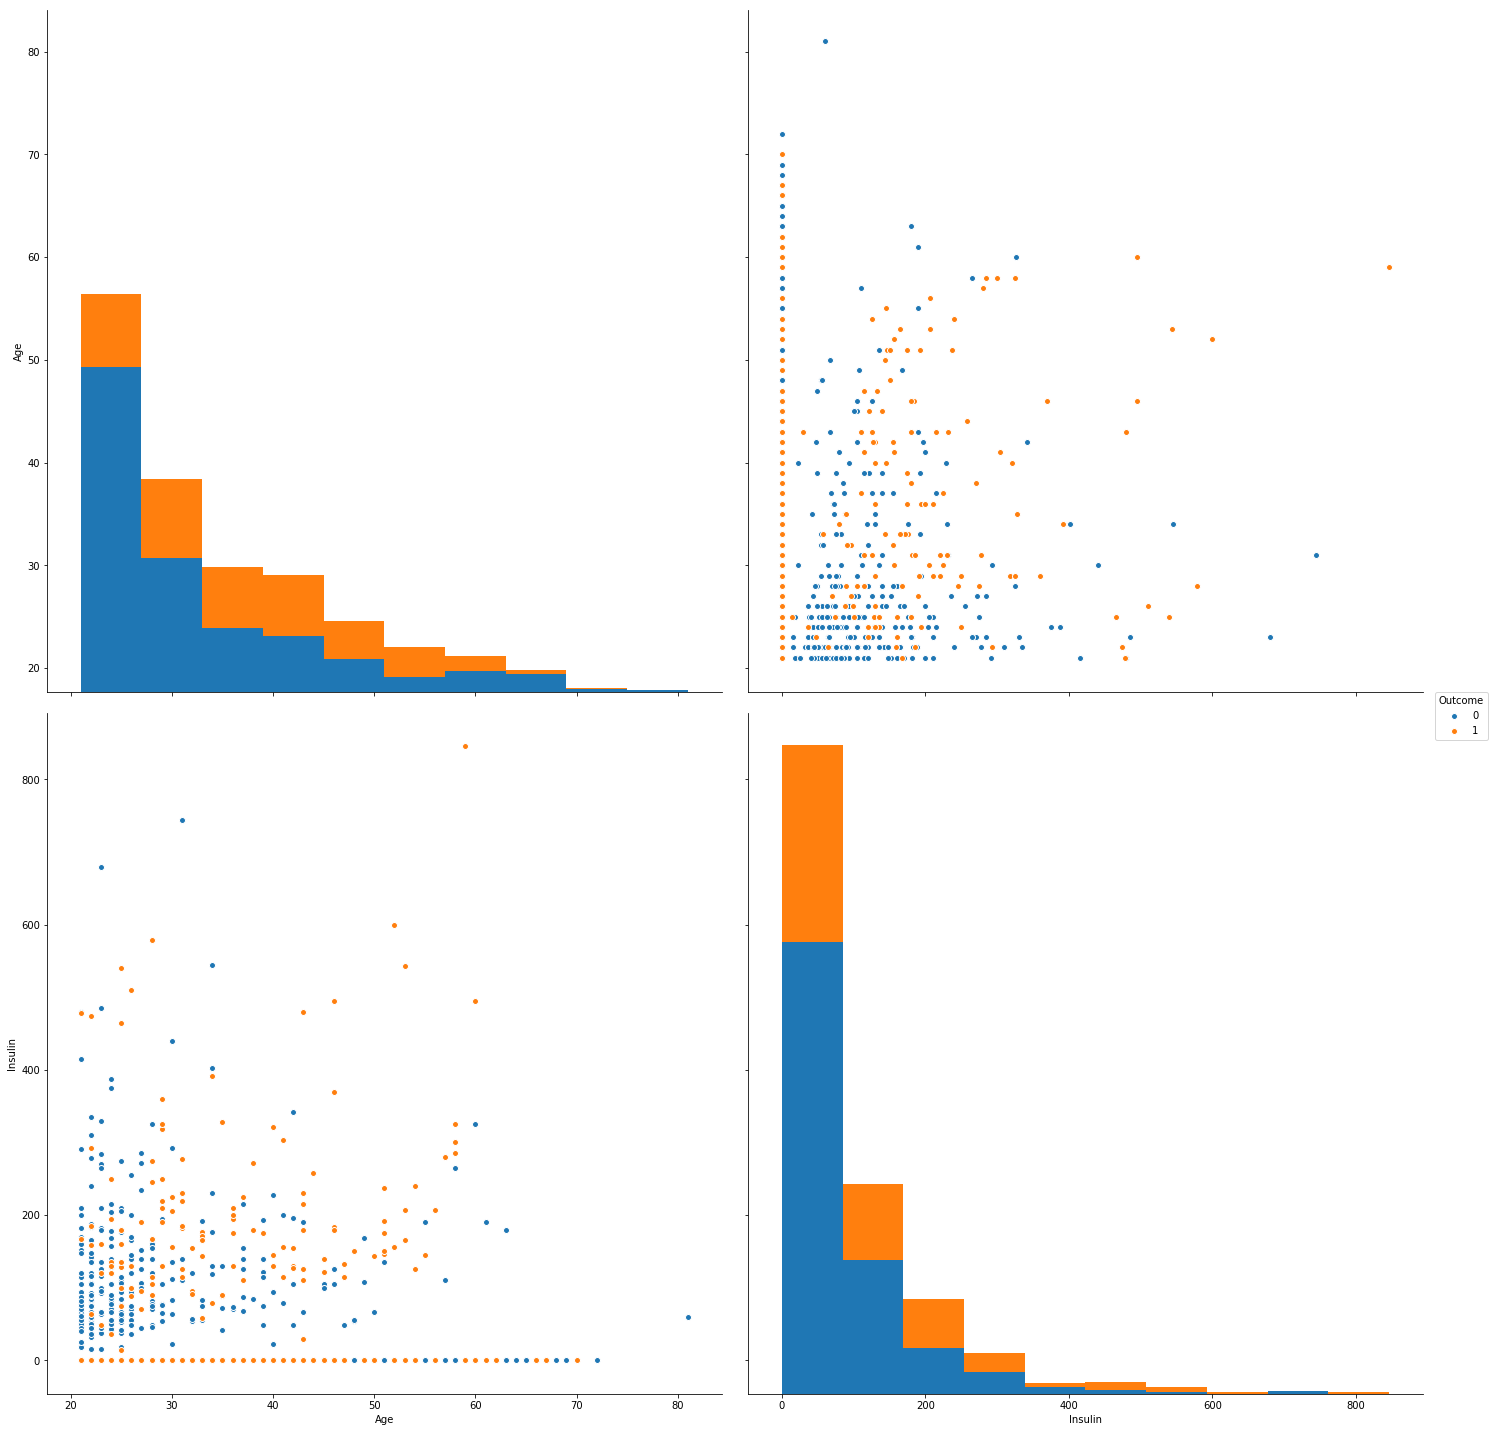

In [127]:
sns.pairplot(diabetes,size=10,hue="Outcome",vars=["Age","Insulin"])
plt.show()

#### Insulin level less than 100 has more diabetic patients, and this make sense as less insulin level lead to diabetes

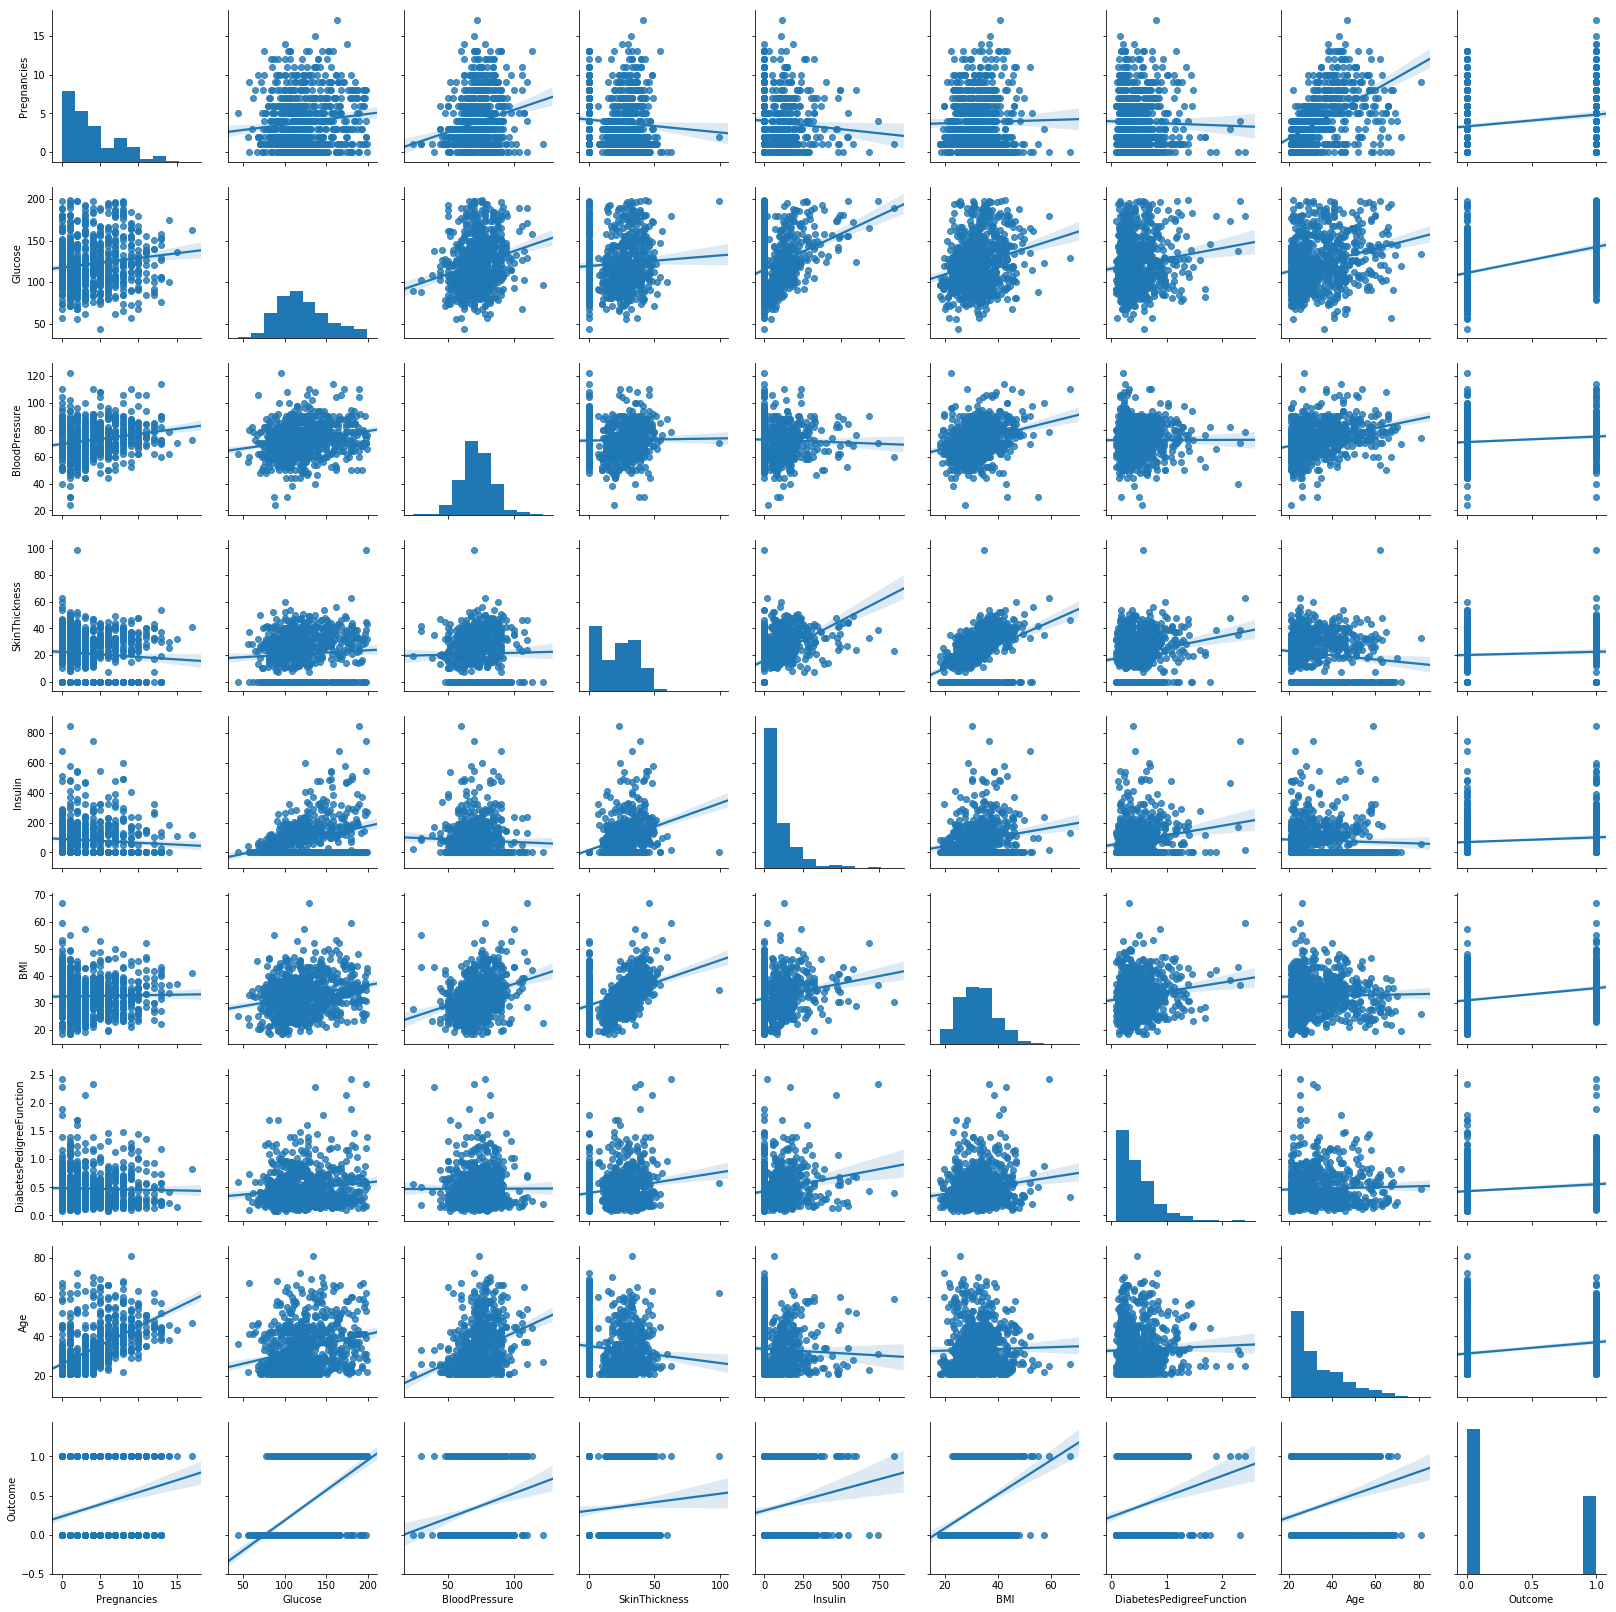

In [128]:
sns.pairplot(diabetes,kind="reg")
plt.show()

In [129]:
corr_matrix = diabetes.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492433
BMI                         0.313680
Age                         0.236029
Pregnancies                 0.216472
DiabetesPedigreeFunction    0.179615
BloodPressure               0.161033
Insulin                     0.128888
SkinThickness               0.072072
Name: Outcome, dtype: float64

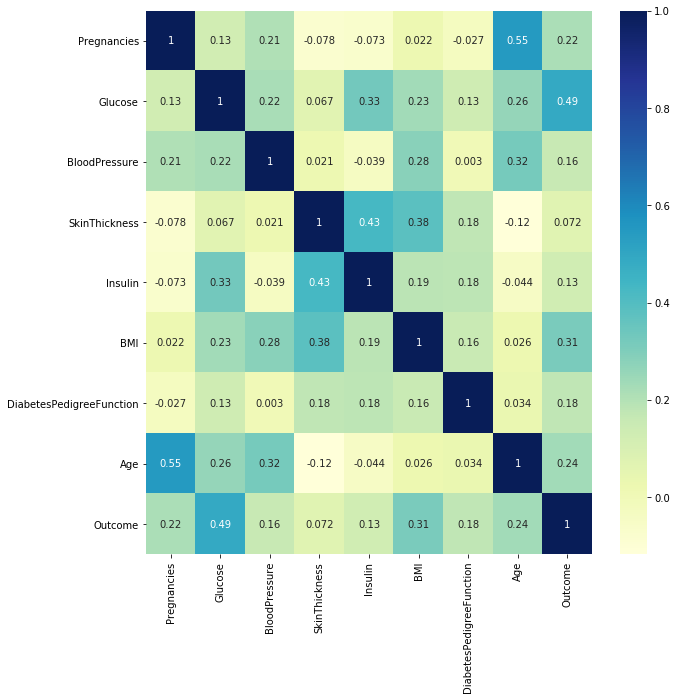

In [130]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu",annot=True)

#### Glucose, BMI, Age,Pregnancies and Insulin are highly correlated among all features 

<a id='model'></a>
## Model Fitting 

In [131]:
# using the linear regression for prediction and spliting the data in train and test set

#X= diabetes.loc[:,['Age','BloodPressure','BMI','Insulin','Pregnancies']]

In [137]:
X = diabetes.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33


In [138]:
y = diabetes.iloc[:,-1]

In [139]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [142]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(529, 8)

(228, 8)

(529,)

(228,)

<a id='reg'></a>
## Logistic Regression


In [143]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
# implementing on whole data set and not on train, test data set 
logreg.fit(X,y)
y_pred_whole=logreg.predict(X)
rmse_logreg_whole=np.sqrt(mean_squared_error(y_pred_whole,y))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
print("RMSE of Log Regression on whole data set: {}".format(rmse_logreg_whole))

RMSE of Log Regression on whole data set: 0.4766683140696945


In [148]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of Logistic Regression on Train,Test data set : {}'.format(rmse))

RMSE of Logistic Regression on Train,Test data set : 0.5043668951391246


#### RMSE of .55 is not impressive as the value are in range of 0-1. we will be moving to next classifier to check your scores

In [149]:
#X_test.head()
X_test.iloc[10,:]
#logreg.predict(X_test.iloc[10,:])
y_test[1:10]
y_pred[1:10]

Pregnancies                   3.000
Glucose                     148.000
BloodPressure                66.000
SkinThickness                25.000
Insulin                       0.000
BMI                          32.500
DiabetesPedigreeFunction      0.256
Age                          22.000
Name: 166, dtype: float64

135    0
28     0
609    0
67     0
387    1
417    1
730    1
195    1
245    1
Name: Outcome, dtype: int64

array([0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

#### R^2 is good, let check at P value of each features

In [150]:
#X2 = sm.add_constant(X)
est = sm.OLS(y, X).fit()
#est2 = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     95.53
Date:                Fri, 13 Apr 2018   Prob (F-statistic):          4.84e-109
Time:                        00:52:14   Log-Likelihood:                -412.10
No. Observations:                 757   AIC:                             840.2
Df Residuals:                     749   BIC:                             877.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies             

In [151]:
logreg.coef_

array([[ 0.11430713,  0.03173767, -0.02618156, -0.00339961, -0.0009734 ,
         0.07109985,  0.70902375,  0.00713442]])

In [152]:
logreg.intercept_

array([-5.87049558])

In [153]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<a id='tree'> </a>
## Decision tree 

In [154]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_pred=tree_reg.predict(X_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [155]:
tree_mse = mean_squared_error(y_test,tree_pred)
rmse = np.sqrt(tree_mse)
print("RMSE of Decision Tree: {}".format(rmse))

RMSE of Decision Tree: 0.5540916385036406


#### Using cross validation to improve the score of model of RMSE along with c alculating the mean, Standard deviation of scores 


In [156]:
from sklearn.model_selection import cross_val_score

cross_score= cross_val_score(tree_reg,X,y,scoring="neg_mean_squared_error",cv=10)
rmse_cv_scores=np.sqrt(-cross_score)
print("RMSE of CV for Tree Classifier: {}".format(rmse_cv_scores))
print("Mean of  CV for Tree Classifier: {}".format(cross_score.mean()))
print("ST Deviation of CV for Tree Classifier: {}".format(cross_score.std()))

RMSE of CV for Tree Classifier: [0.58489765 0.44426166 0.58489765 0.69774071 0.53802759 0.51298918
 0.5        0.5033223  0.57735027 0.52915026]
Mean of  CV for Tree Classifier: -0.3037719298245614
ST Deviation of CV for Tree Classifier: 0.0751689284576986


#### On training model with 10 different training set the RMSE of model as been changed 

####  Similary using the CV for logistic regression  

In [157]:
cross_score_logreg = cross_val_score(logreg,X,y,cv=10,scoring="neg_mean_squared_error")
rmse_cv_logreg=np.sqrt(-cross_score_logreg)
print("RMSE of CV for Logistic regression: {}".format(rmse_cv_logreg))
print("Mean of CV for Logistic regression: {}".format(cross_score_logreg.mean()))
print("St Deviation of CV for Logistic regression: {}".format(cross_score_logreg.std()))

RMSE of CV for Logistic regression: [0.52223297 0.48666426 0.47295265 0.53802759 0.5        0.48666426
 0.4472136  0.46188022 0.5033223  0.4163332 ]
Mean of CV for Logistic regression: -0.2349569377990431
St Deviation of CV for Logistic regression: 0.032532872550271104


<a id='forest'></a>
## Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
randomforest.fit(X,y)
rf_pred = randomforest.predict(X)

cross_score_rf=cross_val_score(randomforest,X,y,cv=10,scoring="neg_mean_squared_error")
rmse_cv_rf=np.sqrt(-cross_score_rf)
print("RMSE of CV for Random Forest: {}".format(rmse_cv_rf))
print("Mean of CV for Random Forest: {}".format(cross_score_rf.mean()))
print("St Deviation of CV for Random Forest: {}".format(cross_score_rf.std()))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RMSE of CV for Random Forest: [0.49669963 0.3773174  0.46140518 0.49643466 0.38113404 0.4050666
 0.36364384 0.35421274 0.47215817 0.38798625]
Mean of CV for Random Forest: -0.17889333333333332
St Deviation of CV for Random Forest: 0.04558331580162426


<a id='best'></a>
## Comparing the result of 3 models 
    1. Random Forest 
    2. Logistic Regression 
    3. Decision tree 

<a id='grid'></a>
## Using Grid Search for choosing the best Parameters

In [159]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,5,7], 'max_features':[2,3,4,5]},
    {'bootstrap':[False],'n_estimators':[3,5], 'max_features':[2,3,4]}
]
rf = RandomForestRegressor()
grid_search= GridSearchCV(rf,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X,y)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 5, 7], 'max_features': [2, 3, 4, 5]}, {'bootstrap': [False], 'n_estimators': [3, 5], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [160]:
grid_search.best_params_

{'max_features': 3, 'n_estimators': 7}

In [161]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=7, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

#### Calculating the Evaluating score on these parameters

In [162]:
grid_search.cv_results_

C:\Users\naman\Anaconda3_new\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\naman\Anaconda3_new\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\naman\Anaconda3_new\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\naman\Anaconda3_new\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('split2_train_score'), which will n

{'mean_fit_time': array([0.00741949, 0.00404773, 0.006251  , 0.        , 0.009376  ,
        0.00625062, 0.00312557, 0.01059775, 0.00747156, 0.00187325,
        0.00937624, 0.00937676, 0.00312552, 0.00625057, 0.00625081,
        0.00625052, 0.00848484, 0.006251  ]),
 'mean_score_time': array([0.00140395, 0.00020051, 0.        , 0.00312519, 0.        ,
        0.00312514, 0.        , 0.00020065, 0.        , 0.00020061,
        0.        , 0.        , 0.00312481, 0.        , 0.        ,
        0.00312519, 0.00060167, 0.00312524]),
 'mean_test_score': array([-0.2062234 , -0.19899604, -0.18084275, -0.21370909, -0.19080581,
        -0.18019572, -0.21532365, -0.1919683 , -0.18707034, -0.21282842,
        -0.19371202, -0.18361955, -0.2122413 , -0.19793923, -0.20945252,
        -0.19133421, -0.20901218, -0.19793923]),
 'mean_train_score': array([-0.05383114, -0.04138631, -0.03503915, -0.05284001, -0.04134656,
        -0.03478959, -0.0521797 , -0.0382137 , -0.03488456, -0.05562768,
        -0.

In [163]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.45411826262325894 {'max_features': 2, 'n_estimators': 3}
0.4460897185411372 {'max_features': 2, 'n_estimators': 5}
0.4252560953235973 {'max_features': 2, 'n_estimators': 7}
0.4622868001270436 {'max_features': 3, 'n_estimators': 3}
0.4368132466139703 {'max_features': 3, 'n_estimators': 5}
0.42449466929590784 {'max_features': 3, 'n_estimators': 7}
0.46402978996066396 {'max_features': 4, 'n_estimators': 3}
0.43814186732711097 {'max_features': 4, 'n_estimators': 5}
0.4325162849202493 {'max_features': 4, 'n_estimators': 7}
0.4613333027898881 {'max_features': 5, 'n_estimators': 3}
0.4401272783366914 {'max_features': 5, 'n_estimators': 5}
0.42850851900359294 {'max_features': 5, 'n_estimators': 7}
0.46069654154397216 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.44490362306650355 {'bootstrap': False, 'max_features': 2, 'n_estimators': 5}
0.45765982699647195 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4374176653984634 {'bootstrap': False, 'max_features': 3, 'n_

In [166]:
#looking at important parameters in Grid search 

feature_imp = grid_search.best_estimator_.feature_importances_
feature_imp
sorted(zip(feature_imp,X.columns),reverse=True)

array([0.08387026, 0.29318574, 0.08050967, 0.05849523, 0.07627374,
       0.1564323 , 0.13221589, 0.11901718])

[(0.29318573953648974, 'Glucose'),
 (0.15643229967543867, 'BMI'),
 (0.1322158873593005, 'DiabetesPedigreeFunction'),
 (0.11901717631318998, 'Age'),
 (0.08387025994633861, 'Pregnancies'),
 (0.08050966793721756, 'BloodPressure'),
 (0.07627373896703517, 'Insulin'),
 (0.05849523026498969, 'SkinThickness')]

<a id='feature'></a>
## Glucose > BMI > DiabetesPedigreeFunction> Age are the most important features 